# 데이터 가져오기

In [1]:
import pandas as pd
import re # smi 파일에서 텍스트 뽑아내는 모듈
file = open("./정승제/[2021 수능특강] 정승제 확률과 통계/01강 합의 법칙, 곱의 법칙_(고3-기본).smi", 'r',encoding = 'cp949')
wholefile = file.readlines()
pattern = re.compile(r'<SYNC Start=(\d+)><P Class=KRCC>\n(.*?)\n', re.DOTALL)
matches = pattern.findall(''.join(wholefile))
# 추출된 데이터를 DataFrame으로 만들기
df = pd.DataFrame(matches, columns=['Time_Stamp(s)', 'Text'])
df['Time_Stamp(s)'] = df['Time_Stamp(s)'].apply(lambda x: float(x)/1000)

In [2]:
df.head()

,Time_Stamp(s),Text
0,9.873,참 잘 해내고 있어. 고민도 많을 텐데. 때로는 독한 말로 잔소리 많아져도 참고 견...
1,50.296,그러니 당당하게 웃어 봐. 우리 꼬맹이들아. 세상의 주인공은 바로 너란 걸.
2,65.024,-잘하고 있어. 잘하고 있어. 어른이 되어 가는 일들을 잘 견뎌낼 거야. 잘하고 있...
3,96.457,"-그렇습니다. 당당하고 씩씩하게 오늘, 그 오늘이 올해의 수능 날이 되기를 진심으로..."
4,112.448,올해도요. 여러분 무조건 확률과 통계만큼은 무조건 여러분에게 만점을 받을 수 있도록...


In [3]:
# Text를 하나의 문장으로 합치기
text = ''.join(df['Text'].tolist())

In [4]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /Users/uujuu/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [5]:
from nltk import sent_tokenize
sentences = sent_tokenize(''.join(text))
sentences[:5]

['참 잘 해내고 있어.',
 '고민도 많을 텐데.',
 '때로는 독한 말로 잔소리 많아져도 참고 견뎌 준 그대들이 정말 안쓰러워.',
 '생선님이 고맙고 너무 미안해.',
 '공부가 인생에서 전부는 아니라고, 너의 인생의 일부분일 거야.']

# 반말/존댓말 분류

In [6]:
import torch
x = torch.rand(5, 3)
print(x)

tensor([[0.1324, 0.4497, 0.9933],
        [0.0336, 0.4893, 0.5597],
        [0.3622, 0.7679, 0.0091],
        [0.2366, 0.9623, 0.9940],
        [0.7291, 0.3054, 0.4232]])


In [7]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification, pipeline

model = AutoModelForSequenceClassification.from_pretrained("j5ng/kcbert-formal-classifier")
tokenizer = AutoTokenizer.from_pretrained('j5ng/kcbert-formal-classifier')

formal_classifier = pipeline(task="text-classification", model=model, tokenizer=tokenizer)
# [{'label': 'LABEL_0', 'score': 0.9999139308929443}]

In [8]:
sentences_list = formal_classifier(sentences)

In [9]:
sentences_df = pd.DataFrame(sentences)
sentences_df

,0
0,참 잘 해내고 있어.
1,고민도 많을 텐데.
2,때로는 독한 말로 잔소리 많아져도 참고 견뎌 준 그대들이 정말 안쓰러워.
3,생선님이 고맙고 너무 미안해.
4,"공부가 인생에서 전부는 아니라고, 너의 인생의 일부분일 거야."
...,...
933,동시에 일어날 수 없도록 빠짐없이.
934,이런 느낌.
935,이것을 가지고 다음 시간에는 순열조합에 대해서 고1 때 공부했었던 그쪽 파트를 연습...
936,수고 많이 하셨습니다.


In [10]:
# LABEL_0과 LABEL_1의 카운트를 데이타프레임으로 만들기
formal_df = pd.DataFrame(sentences_list)
formal_df


,label,score
0,LABEL_0,0.999914
1,LABEL_0,0.982186
2,LABEL_0,0.999914
3,LABEL_0,0.999914
4,LABEL_0,0.999914
...,...,...
933,LABEL_0,0.999791
934,LABEL_0,0.999861
935,LABEL_1,0.999306
936,LABEL_1,0.999306


In [11]:
# LABEL_0을 반말, LABEL_1을 존댓말로 바꾸기
formal_df['label'] = formal_df['label'].replace('LABEL_0', '반말')
formal_df['label'] = formal_df['label'].replace('LABEL_1', '존댓말')
formal_df

,label,score
0,반말,0.999914
1,반말,0.982186
2,반말,0.999914
3,반말,0.999914
4,반말,0.999914
...,...,...
933,반말,0.999791
934,반말,0.999861
935,존댓말,0.999306
936,존댓말,0.999306


In [12]:
# formal_df와 sentences_df 합치기
formal_df = pd.concat([sentences_df, formal_df], axis=1)
formal_df

,0,label,score
0,참 잘 해내고 있어.,반말,0.999914
1,고민도 많을 텐데.,반말,0.982186
2,때로는 독한 말로 잔소리 많아져도 참고 견뎌 준 그대들이 정말 안쓰러워.,반말,0.999914
3,생선님이 고맙고 너무 미안해.,반말,0.999914
4,"공부가 인생에서 전부는 아니라고, 너의 인생의 일부분일 거야.",반말,0.999914
...,...,...,...
933,동시에 일어날 수 없도록 빠짐없이.,반말,0.999791
934,이런 느낌.,반말,0.999861
935,이것을 가지고 다음 시간에는 순열조합에 대해서 고1 때 공부했었던 그쪽 파트를 연습...,존댓말,0.999306
936,수고 많이 하셨습니다.,존댓말,0.999306


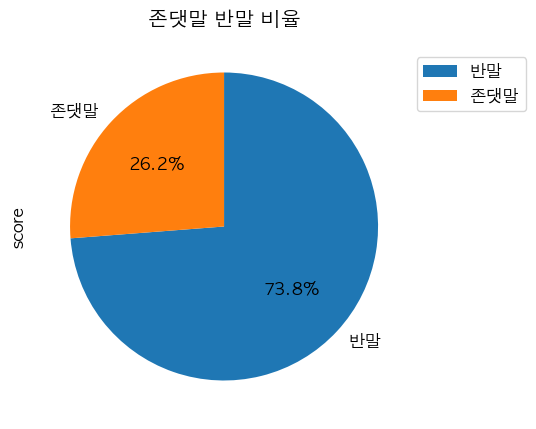

In [13]:
import matplotlib.pyplot as plt
import koreanize_matplotlib

# formal_df의 label별로 그룹화하여 카운트
formal_df.groupby('label').count()

# label별로 파이차트 그리기
plt.rc('font', family='AppleGothic')
plt.rcParams["font.size"] = 12
formal_df.groupby('label').count().plot(kind='pie', y = 'score', title='존댓말 반말 비율', autopct='%.1f%%', startangle=90, \
                                        counterclock = False, figsize=(10,5))
# LABEL_0 : 반말 / LABEL_1 : 존댓말로 표시
plt.legend(['반말', '존댓말'], loc=(1, 0.8))
plt.show()


# 모델 test

In [14]:
# from transformers import RobertaTokenizerFast, RobertaForSequenceClassification, TextClassificationPipeline

# # Load fine-tuned model by HuggingFace Model Hub
# HUGGINGFACE_MODEL_PATH = "bespin-global/klue-roberta-small-3i4k-intent-classification"
# loaded_tokenizer = RobertaTokenizerFast.from_pretrained(HUGGINGFACE_MODEL_PATH )
# loaded_model = RobertaForSequenceClassification.from_pretrained(HUGGINGFACE_MODEL_PATH )

# # using Pipeline
# text_classifier = TextClassificationPipeline(
#     tokenizer=loaded_tokenizer,
#     model=loaded_model,
#     return_all_scores=True
# )

# # predict
# text = "누군가 당신에 대해 나쁘게 말하면 기분이 나쁠 것 같지 않나요?"

# preds_list = text_classifier(text)
# best_pred = preds_list[0]
# print(f"Label of Best Intentation: {max(preds_list[0], key=lambda x: x['score'])['label']}")
# print(f"Score of Best Intentation: {max(preds_list[0], key=lambda x: x['score'])['score']}")


# 의도 파악 모델

In [15]:
import pandas as pd
import re # smi 파일에서 텍스트 뽑아내는 모듈
file = open("./정승제/[2021 수능특강] 정승제 확률과 통계/01강 합의 법칙, 곱의 법칙_(고3-기본).smi", 'r',encoding = 'cp949')
wholefile = file.readlines()
pattern = re.compile(r'<SYNC Start=(\d+)><P Class=KRCC>\n(.*?)\n', re.DOTALL)
matches = pattern.findall(''.join(wholefile))
# 추출된 데이터를 DataFrame으로 만들기
rheto_df = pd.DataFrame(matches, columns=['Time_Stamp(s)', 'Text'])
rheto_df['Time_Stamp(s)'] = df['Time_Stamp(s)'].apply(lambda x: float(x)/1000)

In [16]:
rheto_text = ''.join(rheto_df['Text'].tolist())

In [17]:
rheto_sentences = sent_tokenize(''.join(rheto_text))
rheto_sentences[:5]

['참 잘 해내고 있어.',
 '고민도 많을 텐데.',
 '때로는 독한 말로 잔소리 많아져도 참고 견뎌 준 그대들이 정말 안쓰러워.',
 '생선님이 고맙고 너무 미안해.',
 '공부가 인생에서 전부는 아니라고, 너의 인생의 일부분일 거야.']

In [18]:
# rheto_sentences를 데이터프레임으로 만들기
rheto_sentences_df = pd.DataFrame(rheto_sentences)
rheto_sentences_df.head()

,0
0,참 잘 해내고 있어.
1,고민도 많을 텐데.
2,때로는 독한 말로 잔소리 많아져도 참고 견뎌 준 그대들이 정말 안쓰러워.
3,생선님이 고맙고 너무 미안해.
4,"공부가 인생에서 전부는 아니라고, 너의 인생의 일부분일 거야."


In [19]:
from transformers import RobertaTokenizerFast, RobertaForSequenceClassification, TextClassificationPipeline

# Load fine-tuned model by HuggingFace Model Hub
HUGGINGFACE_MODEL_PATH = "bespin-global/klue-roberta-small-3i4k-intent-classification"
loaded_tokenizer = RobertaTokenizerFast.from_pretrained(HUGGINGFACE_MODEL_PATH )
loaded_model = RobertaForSequenceClassification.from_pretrained(HUGGINGFACE_MODEL_PATH )

# using Pipeline
text_classifier = TextClassificationPipeline(
    tokenizer=loaded_tokenizer,
    model=loaded_model,
    return_all_scores=True
)

fragment = 0
statement = 0
question = 0
command = 0
rhetorical_question = 0
rhetorical_command = 0
intonation_dependent_utterance = 0

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/transformers/pipelines/text_classification.py:105: UserWarning: `return_all_scores` is now deprecated,  if want a similar functionality use `top_k=None` instead of `return_all_scores=True` or `top_k=1` instead of `return_all_scores=False`.
  warnings.warn(


In [20]:
# rheto_sentences_df를 모델에 넣어서 예측하고 각 문장의 예측결과를 새 컬럼에 저장하기
for i in range(len(rheto_sentences)):
    preds_list = text_classifier(rheto_sentences[i])
    best_pred = preds_list[0]
    rheto_sentences_df.loc[i, '의도'] = max(preds_list[0], key=lambda x: x['score'])['label']
    rheto_sentences_df.loc[i, '의도_점수'] = max(preds_list[0], key=lambda x: x['score'])['score']
    if rheto_sentences_df.loc[i, '의도'] == 'fragment':
        fragment += 1
    elif rheto_sentences_df.loc[i, '의도'] == 'statement':
        statement += 1
    elif rheto_sentences_df.loc[i, '의도'] == 'question':
        question += 1
    elif rheto_sentences_df.loc[i, '의도'] == 'command':
        command += 1
    elif rheto_sentences_df.loc[i, '의도'] == 'rhetorical_question':
        rhetorical_question += 1
    elif rheto_sentences_df.loc[i, '의도'] == 'rhetorical_command':
        rhetorical_command += 1
    elif rheto_sentences_df.loc[i, '의도'] == 'intonation_dependent_utterance':
        intonation_dependent_utterance += 1

rheto_sentences_df

,0,의도,의도_점수
0,참 잘 해내고 있어.,statement,0.833116
1,고민도 많을 텐데.,statement,0.986641
2,때로는 독한 말로 잔소리 많아져도 참고 견뎌 준 그대들이 정말 안쓰러워.,statement,0.991425
3,생선님이 고맙고 너무 미안해.,statement,0.996016
4,"공부가 인생에서 전부는 아니라고, 너의 인생의 일부분일 거야.",statement,0.987511
...,...,...,...
933,동시에 일어날 수 없도록 빠짐없이.,command,0.793360
934,이런 느낌.,statement,0.480460
935,이것을 가지고 다음 시간에는 순열조합에 대해서 고1 때 공부했었던 그쪽 파트를 연습...,statement,0.954791
936,수고 많이 하셨습니다.,statement,0.974762


In [21]:
# rheto_sentences_df의 0 컬럼의 이름을 문장으로 바꾸기
rheto_sentences_df.rename(columns={0:'문장'}, inplace=True)
rheto_sentences_df

,문장,의도,의도_점수
0,참 잘 해내고 있어.,statement,0.833116
1,고민도 많을 텐데.,statement,0.986641
2,때로는 독한 말로 잔소리 많아져도 참고 견뎌 준 그대들이 정말 안쓰러워.,statement,0.991425
3,생선님이 고맙고 너무 미안해.,statement,0.996016
4,"공부가 인생에서 전부는 아니라고, 너의 인생의 일부분일 거야.",statement,0.987511
...,...,...,...
933,동시에 일어날 수 없도록 빠짐없이.,command,0.793360
934,이런 느낌.,statement,0.480460
935,이것을 가지고 다음 시간에는 순열조합에 대해서 고1 때 공부했었던 그쪽 파트를 연습...,statement,0.954791
936,수고 많이 하셨습니다.,statement,0.974762


In [22]:
# rheto_sentences_df와 formal_df 합치기
rheto_sentences_df = pd.concat([rheto_sentences_df, formal_df], axis=1)
rheto_sentences_df

,문장,의도,의도_점수,0,label,score
0,참 잘 해내고 있어.,statement,0.833116,참 잘 해내고 있어.,반말,0.999914
1,고민도 많을 텐데.,statement,0.986641,고민도 많을 텐데.,반말,0.982186
2,때로는 독한 말로 잔소리 많아져도 참고 견뎌 준 그대들이 정말 안쓰러워.,statement,0.991425,때로는 독한 말로 잔소리 많아져도 참고 견뎌 준 그대들이 정말 안쓰러워.,반말,0.999914
3,생선님이 고맙고 너무 미안해.,statement,0.996016,생선님이 고맙고 너무 미안해.,반말,0.999914
4,"공부가 인생에서 전부는 아니라고, 너의 인생의 일부분일 거야.",statement,0.987511,"공부가 인생에서 전부는 아니라고, 너의 인생의 일부분일 거야.",반말,0.999914
...,...,...,...,...,...,...
933,동시에 일어날 수 없도록 빠짐없이.,command,0.793360,동시에 일어날 수 없도록 빠짐없이.,반말,0.999791
934,이런 느낌.,statement,0.480460,이런 느낌.,반말,0.999861
935,이것을 가지고 다음 시간에는 순열조합에 대해서 고1 때 공부했었던 그쪽 파트를 연습...,statement,0.954791,이것을 가지고 다음 시간에는 순열조합에 대해서 고1 때 공부했었던 그쪽 파트를 연습...,존댓말,0.999306
936,수고 많이 하셨습니다.,statement,0.974762,수고 많이 하셨습니다.,존댓말,0.999306


In [23]:
# 0 컬럼 삭제
rheto_sentences_df.drop(0, axis=1, inplace=True)
rheto_sentences_df

,문장,의도,의도_점수,label,score
0,참 잘 해내고 있어.,statement,0.833116,반말,0.999914
1,고민도 많을 텐데.,statement,0.986641,반말,0.982186
2,때로는 독한 말로 잔소리 많아져도 참고 견뎌 준 그대들이 정말 안쓰러워.,statement,0.991425,반말,0.999914
3,생선님이 고맙고 너무 미안해.,statement,0.996016,반말,0.999914
4,"공부가 인생에서 전부는 아니라고, 너의 인생의 일부분일 거야.",statement,0.987511,반말,0.999914
...,...,...,...,...,...
933,동시에 일어날 수 없도록 빠짐없이.,command,0.793360,반말,0.999791
934,이런 느낌.,statement,0.480460,반말,0.999861
935,이것을 가지고 다음 시간에는 순열조합에 대해서 고1 때 공부했었던 그쪽 파트를 연습...,statement,0.954791,존댓말,0.999306
936,수고 많이 하셨습니다.,statement,0.974762,존댓말,0.999306


In [24]:
# 각 의도에 따른 반말, 존댓말 수 카운트해서 데이터프레임으로 만들기
formal_df = rheto_sentences_df.groupby(['의도', 'label']).count()
formal_df


문장  의도_점수  score
의도                             label                   
command                        반말      78     78     78
                               존댓말     19     19     19
fragment                       반말      24     24     24
intonation-dependent utterance 반말      18     18     18
                               존댓말      5      5      5
question                       반말     198    198    198
                               존댓말     39     39     39
rhetorical command             반말       2      2      2
                               존댓말      1      1      1
rhetorical question            반말      60     60     60
                               존댓말     26     26     26
statement                      반말     312    312    312
                               존댓말    156    156    156

In [25]:
rheto_sentences_df['의도'].value_counts()

의도
statement                         468
question                          237
command                            97
rhetorical question                86
fragment                           24
intonation-dependent utterance     23
rhetorical command                  3
Name: count, dtype: int64

In [26]:
# 의도와 label에 대한 개수 계산
counts = rheto_sentences_df.groupby(['의도', 'label']).size().unstack(fill_value=0)

# '반말'과 '존댓말'의 개수를 새로운 컬럼에 추가
rheto_sentences_df['반말_개수'] = rheto_sentences_df['의도'].map(counts['반말'])
rheto_sentences_df['존댓말_개수'] = rheto_sentences_df['의도'].map(counts['존댓말'])
rheto_sentences_df


,문장,의도,의도_점수,label,score,반말_개수,존댓말_개수
0,참 잘 해내고 있어.,statement,0.833116,반말,0.999914,312,156
1,고민도 많을 텐데.,statement,0.986641,반말,0.982186,312,156
2,때로는 독한 말로 잔소리 많아져도 참고 견뎌 준 그대들이 정말 안쓰러워.,statement,0.991425,반말,0.999914,312,156
3,생선님이 고맙고 너무 미안해.,statement,0.996016,반말,0.999914,312,156
4,"공부가 인생에서 전부는 아니라고, 너의 인생의 일부분일 거야.",statement,0.987511,반말,0.999914,312,156
...,...,...,...,...,...,...,...
933,동시에 일어날 수 없도록 빠짐없이.,command,0.793360,반말,0.999791,78,19
934,이런 느낌.,statement,0.480460,반말,0.999861,312,156
935,이것을 가지고 다음 시간에는 순열조합에 대해서 고1 때 공부했었던 그쪽 파트를 연습...,statement,0.954791,존댓말,0.999306,312,156
936,수고 많이 하셨습니다.,statement,0.974762,존댓말,0.999306,312,156


In [27]:
# 의도, 반말_개수, 존댓말_개수 컬럼만 추출
rheto_sentences_df = rheto_sentences_df[['문장', '의도', '반말_개수', '존댓말_개수']]
rheto_sentences_df

,문장,의도,반말_개수,존댓말_개수
0,참 잘 해내고 있어.,statement,312,156
1,고민도 많을 텐데.,statement,312,156
2,때로는 독한 말로 잔소리 많아져도 참고 견뎌 준 그대들이 정말 안쓰러워.,statement,312,156
3,생선님이 고맙고 너무 미안해.,statement,312,156
4,"공부가 인생에서 전부는 아니라고, 너의 인생의 일부분일 거야.",statement,312,156
...,...,...,...,...
933,동시에 일어날 수 없도록 빠짐없이.,command,78,19
934,이런 느낌.,statement,312,156
935,이것을 가지고 다음 시간에는 순열조합에 대해서 고1 때 공부했었던 그쪽 파트를 연습...,statement,312,156
936,수고 많이 하셨습니다.,statement,312,156


In [31]:
rheto_sentences_df['문장_수'] = rheto_sentences_df.groupby('의도')['문장'].transform('count')
rheto_sentences_df

/var/folders/g0/x_kxlb4103n56m4kw58smlkw0000gn/T/ipykernel_42912/523271772.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rheto_sentences_df['문장_수'] = rheto_sentences_df.groupby('의도')['문장'].transform('count')


,문장,의도,반말_개수,존댓말_개수,문장_수
0,참 잘 해내고 있어.,statement,312,156,468
1,고민도 많을 텐데.,statement,312,156,468
2,때로는 독한 말로 잔소리 많아져도 참고 견뎌 준 그대들이 정말 안쓰러워.,statement,312,156,468
3,생선님이 고맙고 너무 미안해.,statement,312,156,468
4,"공부가 인생에서 전부는 아니라고, 너의 인생의 일부분일 거야.",statement,312,156,468
...,...,...,...,...,...
933,동시에 일어날 수 없도록 빠짐없이.,command,78,19,97
934,이런 느낌.,statement,312,156,468
935,이것을 가지고 다음 시간에는 순열조합에 대해서 고1 때 공부했었던 그쪽 파트를 연습...,statement,312,156,468
936,수고 많이 하셨습니다.,statement,312,156,468


In [32]:
# 의도 중복 제거
rheto_sentences_df.drop_duplicates(['의도'], inplace=True)
rheto_sentences_df

/var/folders/g0/x_kxlb4103n56m4kw58smlkw0000gn/T/ipykernel_42912/2754195572.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rheto_sentences_df.drop_duplicates(['의도'], inplace=True)


,문장,의도,반말_개수,존댓말_개수,문장_수
0,참 잘 해내고 있어.,statement,312,156,468
5,그러니 당당하게 웃어 봐.,command,78,19,97
7,세상의 주인공은 바로 너란 걸.-잘하고 있어.,question,198,39,237
8,잘하고 있어.,intonation-dependent utterance,18,5,23
11,"누구나 겪는 과정일 뿐 당당하게 씩씩하게 오늘을 맞이하자, 우리.",rhetorical command,2,1,3
29,왜 그러느냐 하면 여러분에게 해 주고 싶은 이야기가 많아서.,rhetorical question,60,26,86
39,어?,fragment,24,0,24


In [33]:
# 문장 컬럼 삭제
rheto_sentences_df.drop('문장', axis=1, inplace=True)
rheto_sentences_df

/var/folders/g0/x_kxlb4103n56m4kw58smlkw0000gn/T/ipykernel_42912/3930731146.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rheto_sentences_df.drop('문장', axis=1, inplace=True)


,의도,반말_개수,존댓말_개수,문장_수
0,statement,312,156,468
5,command,78,19,97
7,question,198,39,237
8,intonation-dependent utterance,18,5,23
11,rhetorical command,2,1,3
29,rhetorical question,60,26,86
39,fragment,24,0,24


/var/folders/g0/x_kxlb4103n56m4kw58smlkw0000gn/T/ipykernel_42912/290383406.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rheto_sentences_df['반말_존댓말_비율_반말'] = rheto_sentences_df['반말_개수'] / rheto_sentences_df['문장_수']
/var/folders/g0/x_kxlb4103n56m4kw58smlkw0000gn/T/ipykernel_42912/290383406.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rheto_sentences_df['반말_존댓말_비율_존댓말'] = rheto_sentences_df['존댓말_개수'] / rheto_sentences_df['문장_수']


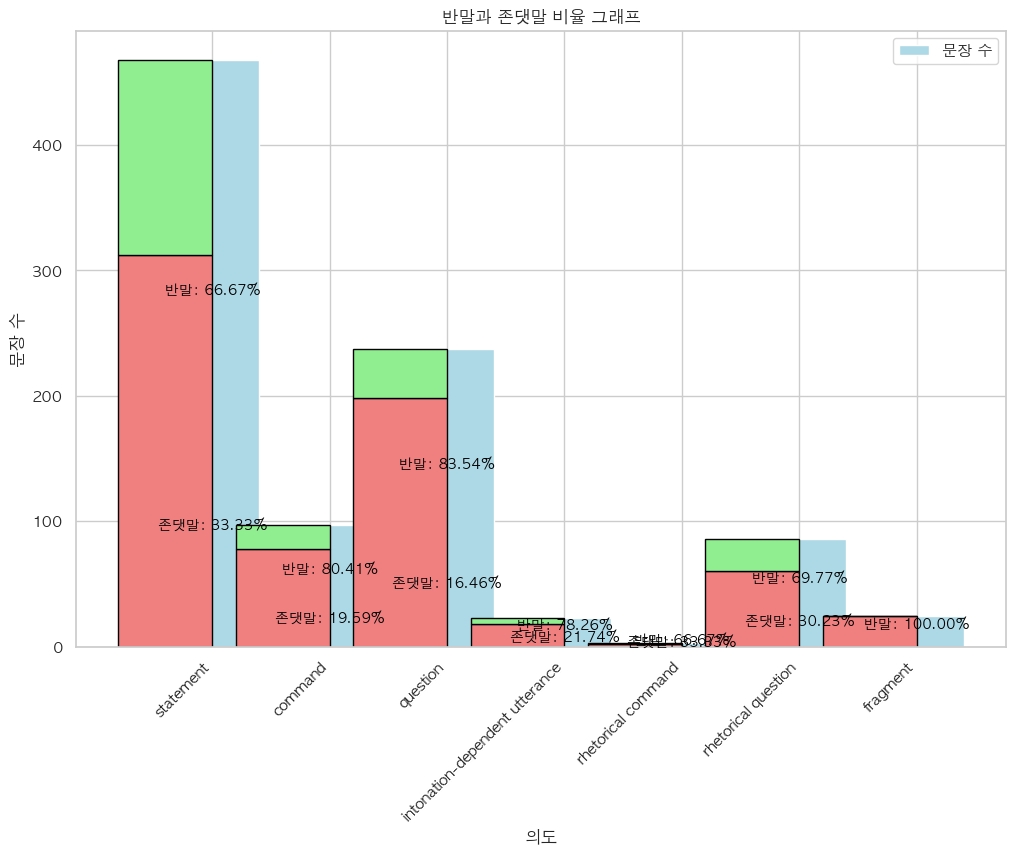

In [96]:
# 반말과 존댓말의 비율 계산
rheto_sentences_df['반말_존댓말_비율_반말'] = rheto_sentences_df['반말_개수'] / rheto_sentences_df['문장_수']
rheto_sentences_df['반말_존댓말_비율_존댓말'] = rheto_sentences_df['존댓말_개수'] / rheto_sentences_df['문장_수']

# 그래프 크기 조정
plt.figure(figsize=(12, 8))

# 반말과 존댓말의 비율을 막대 그래프 안에 텍스트로 표시
bars = plt.bar(rheto_sentences_df['의도'], rheto_sentences_df['문장_수'], label='문장 수', color='lightblue')

for bar, ratio_1, ratio_2 in zip(bars, rheto_sentences_df['반말_존댓말_비율_반말'], rheto_sentences_df['반말_존댓말_비율_존댓말']):
    color_1 = 'lightcoral'  # 반말 색깔
    color_2 = 'lightgreen'  # 존댓말 색깔
    plt.bar(bar.get_x(), ratio_1 * bar.get_height(), color=color_1, width=bar.get_width(), edgecolor='black')
    plt.bar(bar.get_x(), ratio_2 * bar.get_height(), bottom=ratio_1 * bar.get_height(), color=color_2, width=bar.get_width(), edgecolor='black')

# 비율을 그래프에 직접 표시
for bar, ratio_1, ratio_2 in zip(bars, rheto_sentences_df['반말_존댓말_비율_반말'], rheto_sentences_df['반말_존댓말_비율_존댓말']):
    if ratio_1 > 0:
        plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() * 0.6, f'반말: {ratio_1:.2%}', ha='center', color='black', fontsize=10)
    if ratio_2 > 0:
        plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() * 0.2, f'존댓말: {ratio_2:.2%}', ha='center', color='black', fontsize=10)

plt.xlabel('의도')
plt.ylabel('문장 수')
plt.title('반말과 존댓말 비율 그래프')
plt.xticks(rotation=45, ha='right')  # x축 레이블 회전
plt.legend()

plt.show()

/var/folders/g0/x_kxlb4103n56m4kw58smlkw0000gn/T/ipykernel_42912/1316268713.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rheto_sentences_df['반말_존댓말_비율_반말'] = rheto_sentences_df['반말_개수'] / rheto_sentences_df['문장_수']
/var/folders/g0/x_kxlb4103n56m4kw58smlkw0000gn/T/ipykernel_42912/1316268713.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rheto_sentences_df['반말_존댓말_비율_존댓말'] = rheto_sentences_df['존댓말_개수'] / rheto_sentences_df['문장_수']


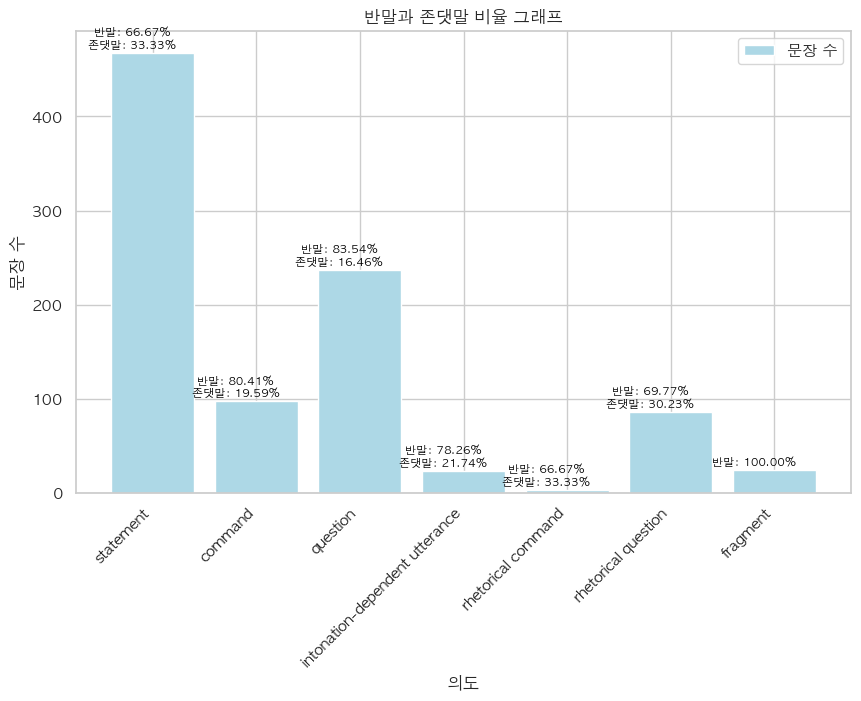

In [100]:
# 반말과 존댓말의 비율 계산
rheto_sentences_df['반말_존댓말_비율_반말'] = rheto_sentences_df['반말_개수'] / rheto_sentences_df['문장_수']
rheto_sentences_df['반말_존댓말_비율_존댓말'] = rheto_sentences_df['존댓말_개수'] / rheto_sentences_df['문장_수']

# 그래프 그리기
plt.figure(figsize=(10, 6))
bars = plt.bar(rheto_sentences_df['의도'], rheto_sentences_df['문장_수'], label='문장 수', color='lightblue')

# 반말과 존댓말의 비율을 막대 그래프 안에 표시 (텍스트 크기 조정)
for bar, ratio_1, ratio_2 in zip(bars, rheto_sentences_df['반말_존댓말_비율_반말'], rheto_sentences_df['반말_존댓말_비율_존댓말']):
    # 0% 값은 표시하지 않음
    if ratio_1 > 0:
        plt.text(
            bar.get_x() + bar.get_width() / 2 - 0.2, 
            bar.get_height() + 5, 
            f'반말: {ratio_1:.2%}\n존댓말: {ratio_2:.2%}' if ratio_2 > 0 else f'반말: {ratio_1:.2%}', 
            ha='center', 
            color='black',
            fontsize=8  # 텍스트 크기 조정
        )

plt.xlabel('의도')
plt.ylabel('문장 수')
plt.title('반말과 존댓말 비율 그래프')
plt.xticks(rotation=45, ha='right')  # x축 레이블 회전
plt.legend()
plt.show()